#  HR Salary Dashboard - Train the Dataset and Predict Salary

Student's Name: Ketaki Desale.

Internship Project Title: TCS iON RIO-125: HR Salary Dashboard - Train the Dataset and Predict Salary.
Organization: TCS iON.

Industry Mentor: Debashis Roy.

Institute: B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan.

Importing Necessary Libraries For Data Wrangling

In [1]:

import pandas as pd
import numpy as np


Importing Necessary Libraries For Data Visualization

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Remove unnecessary warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

Importing and Reading Dataset

In [4]:
data=pd.read_csv(r"C:\Users\91779\Downloads\salarydata.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



Print The Last 5 Lines Of The Dataset

In [5]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K



Display The Full Summary Of The Dataframe

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


Shape Of The Dataset

In [7]:
data.shape

(32561, 14)

Finding Null Values In Dataset

In [8]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


Statistics Summary Of The Dataframe

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0



Statistics Summary Of The Dataframe Of Object Datatype

In [10]:
data.describe(include='object').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
salary,32561,2,<=50K,24720


Check Datatypes

In [11]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

Display Columns Of The Dataset

In [12]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [13]:
data.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


1)Upon scrutinizing the dataset, it becomes evident that variables like capital-gain and capital-loss hold negligible influence on salary prediction.


2)Hence, it is prudent to discard these columns. Additionally, we opt to remove the education-num column as it essentially duplicates the information present in the education column in numerical form.

Unique Occurance Of Each Variable

In [14]:
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

age : 73 

workclass : 9 

education : 16 

marital-status : 7 

occupation : 15 

relationship : 6 

race : 5 

sex : 2 

hours-per-week : 94 

native-country : 42 

salary : 2 



Exploratory Data Analysis EDA

In [15]:
cat_var = []

for column in data:
    if data[column].dtype == 'O':
        cat_var.append(column)
cat_var

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

Finding the unique values in each categorical variables

In [16]:
for col in cat_var:
    print('\n', col, '\n', data[col].unique(), '\n', '---' * 40)


 workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 
 ------------------------------------------------------------------------------------------------------------------------

 education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 
 ------------------------------------------------------------------------------------------------------------------------

 marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 
 ------------------------------------------------------------------------------------------------------------------------

 occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-in

Replace '?' row with nan to apply the changes to whole dataframe

In [17]:
data.replace('?', np.NaN, inplace=True)

Finding the unique values in each categorical variables

In [18]:
for col in cat_var:
    print('\n', col, '\n', data[col].unique(), '\n', '---' * 40)


 workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 
 ------------------------------------------------------------------------------------------------------------------------

 education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 
 ------------------------------------------------------------------------------------------------------------------------

 marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 
 ------------------------------------------------------------------------------------------------------------------------

 occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-in

In [19]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
hours-per-week     int64
native-country    object
salary            object
dtype: object

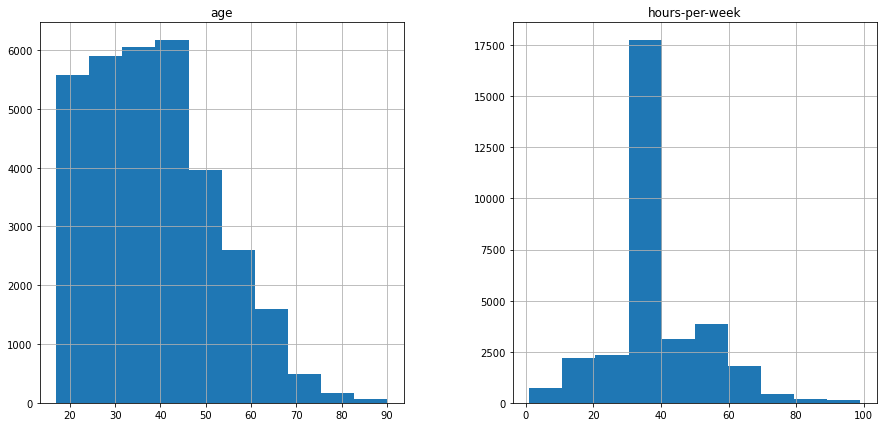

In [20]:
freqgraph = data.select_dtypes(include = ['int'])
freqgraph.hist(figsize =(15,7))
plt.show()

Filling missing values using mode

In [21]:
for i in ['workclass', 'occupation', 'native-country']:     
    data[i]=data[i].fillna(data[i].mode()[0])

In [22]:
num_cols =  data.select_dtypes(["int"])
#get the valuecounts
for i in num_cols.columns:
    print(num_cols[i].value_counts())
    print("-"*50)
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
--------------------------------------------------


40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64
--------------------------------------------------




In [23]:
cat_cols =  data.select_dtypes(["object"])
#get the valuecounts
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print("-"*50)
    print("\n")

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------------


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------------------------------------


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
----------------------

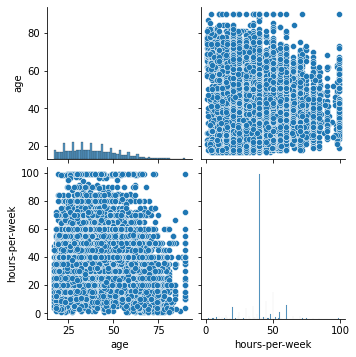

In [24]:
sns.pairplot(data)
plt.show()

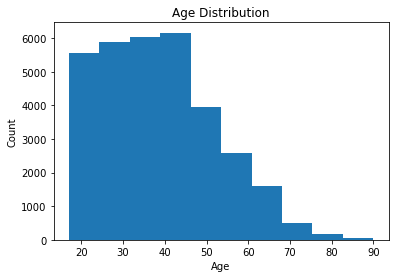

In [25]:
#checking age

plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
# plt.xticks(np.arange(20,100,5))
# plt.rcParams['figure.figsize'] = (8,8)
plt.title('Age Distribution')
plt.show()

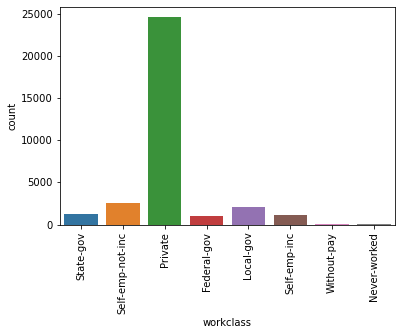

In [26]:
#checking workclass

sns.countplot(x = data['workclass'], data = data)
plt.xticks(rotation = 90)
plt.show()

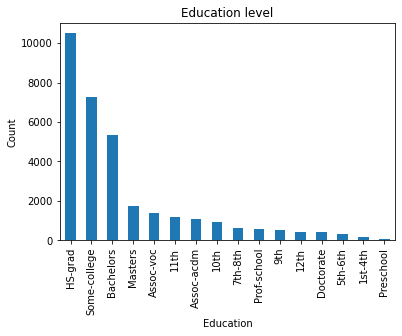

In [27]:
#checking education

data['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education level')
plt.show()

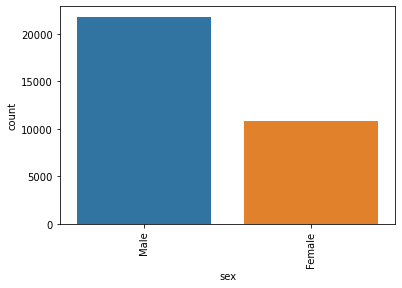

In [28]:
#checking sex

sns.countplot(x = data['sex'], data = data)
plt.xticks(rotation = 90)
plt.show()

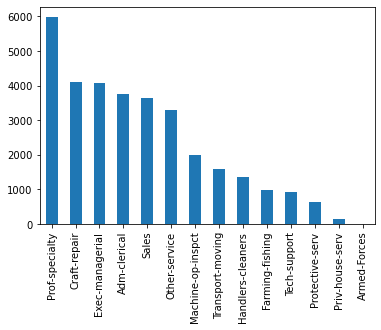

In [29]:
#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.show()

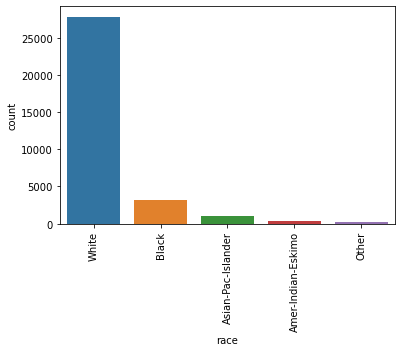

In [30]:
#Checking race

sns.countplot(x = data['race'], data = data)
plt.xticks(rotation = 90)
plt.show()

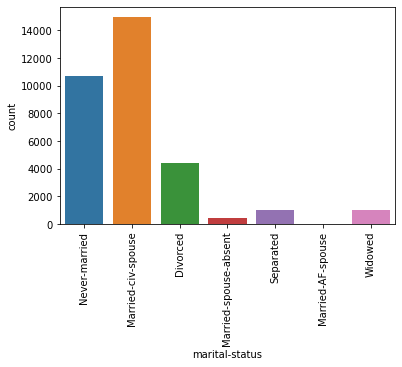

In [31]:
#checking marital-status

sns.countplot(x = data['marital-status'], data = data)
plt.xticks(rotation = 90)
plt.show()

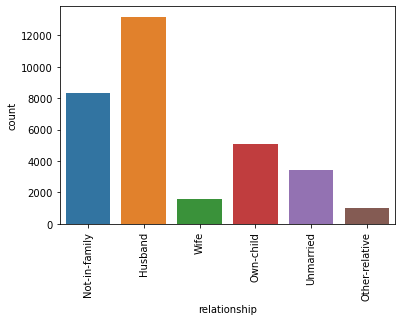

In [32]:
#checking relationship

sns.countplot(x = data['relationship'], data = data)
plt.xticks(rotation = 90)
plt.show()


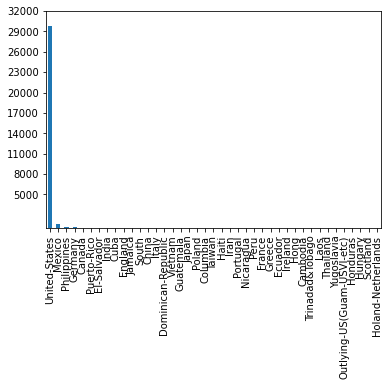

In [33]:
#checking native-country

data['native-country'].value_counts().plot(kind = 'bar')
plt.yticks(np.arange(5000,33000,3000))
plt.show()

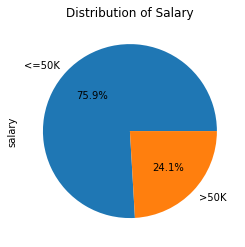

In [34]:
data['salary'].value_counts().plot.pie(autopct='%.1f%%')
plt.title("Distribution of Salary")
plt.rcParams['figure.figsize'] = (10,5)
plt.show() 

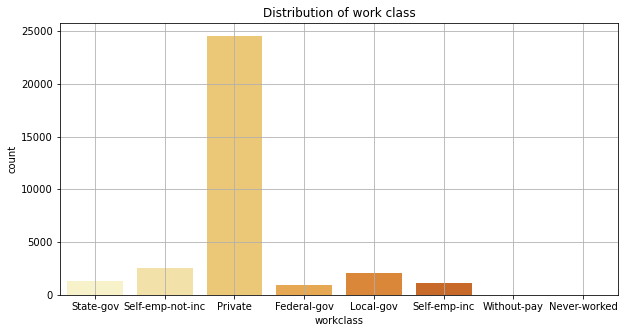

In [35]:
sns.countplot(x= data['workclass'],palette="YlOrBr")
plt.title('Distribution of work class')
plt.grid()
plt.show()

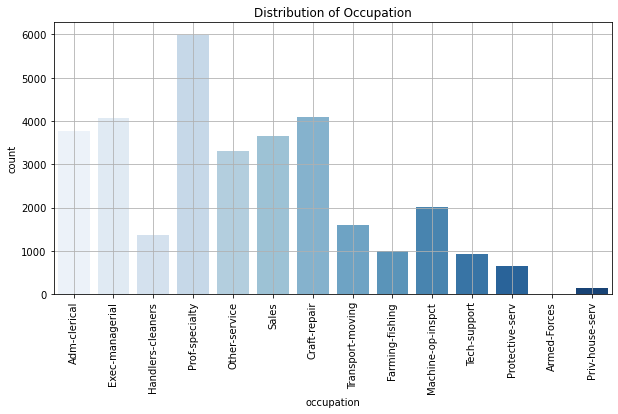

In [36]:
sns.countplot(x= data['occupation'],palette="Blues")
plt.title('Distribution of Occupation')
plt.xticks(rotation=90)
plt.grid()
plt.show()

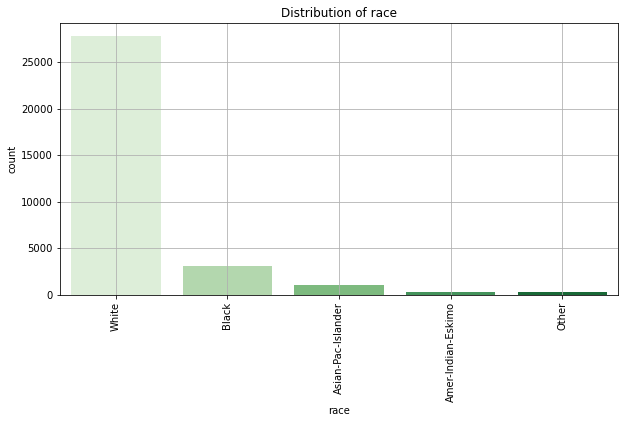

In [37]:
sns.countplot(x= data['race'],palette="Greens")
plt.title('Distribution of race')
plt.xticks(rotation=90)
plt.grid()
plt.show()

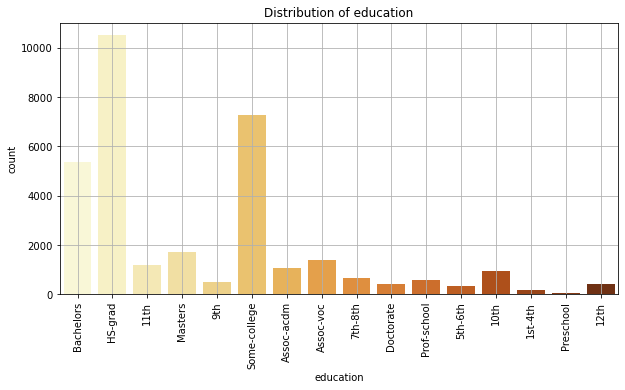

In [38]:
sns.countplot(x= data['education'],palette="YlOrBr")
plt.title('Distribution of education')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

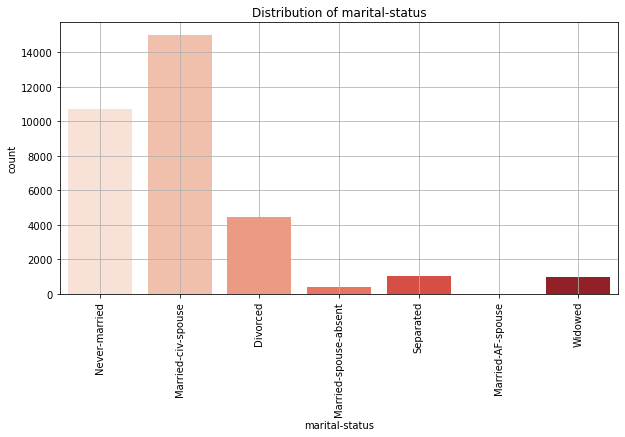

In [39]:
sns.countplot(x= data['marital-status'],palette="Reds")
plt.title('Distribution of marital-status')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

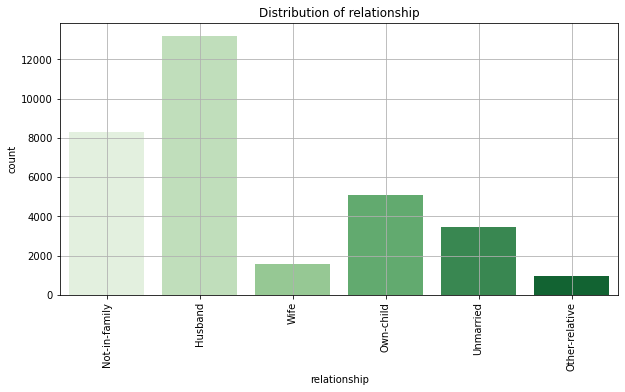

In [40]:
sns.countplot(x= data['relationship'],palette="Greens")
plt.title('Distribution of relationship')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

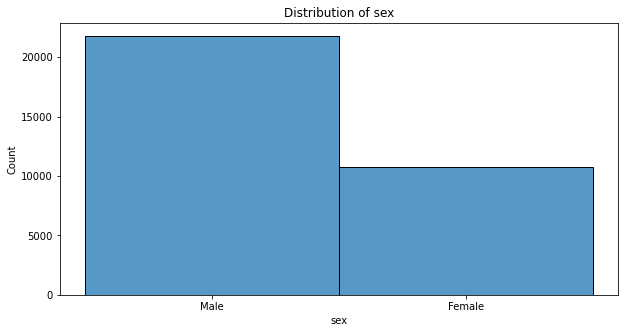

In [41]:
sns.histplot(data['sex'])
plt.title('Distribution of sex')
plt.show()

Text(0.5, 1.0, 'Users by Salary and Gender')

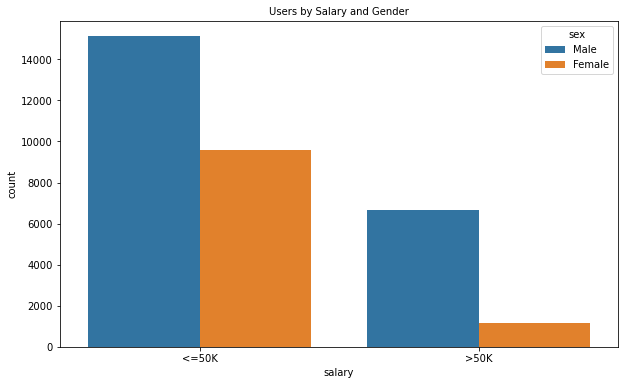

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='salary',hue='sex',data=data)
plt.title("Users by Salary and Gender", fontsize = 10)

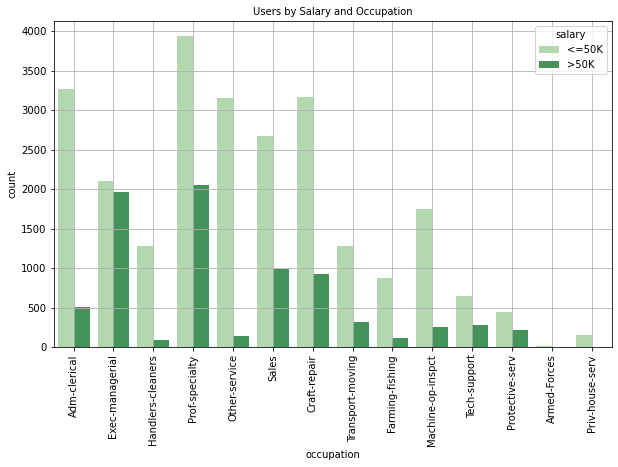

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation',hue='salary',data=data,palette="Greens")
plt.title("Users by Salary and Occupation", fontsize = 10)
plt.xticks(rotation = 90)
plt.grid()

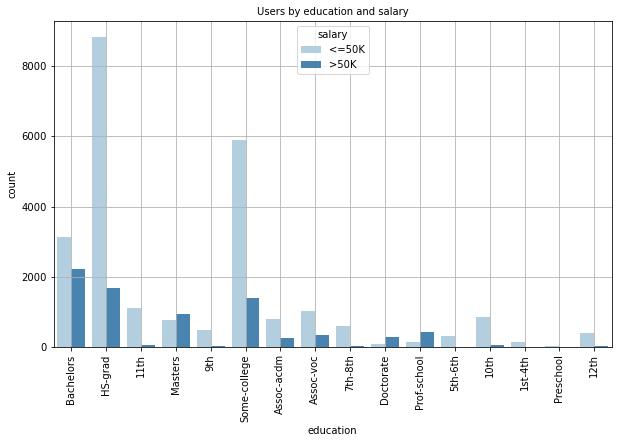

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education',hue='salary',data=data,palette="Blues")
plt.title("Users by education and salary", fontsize = 10)
plt.xticks(rotation = 90)
plt.grid()

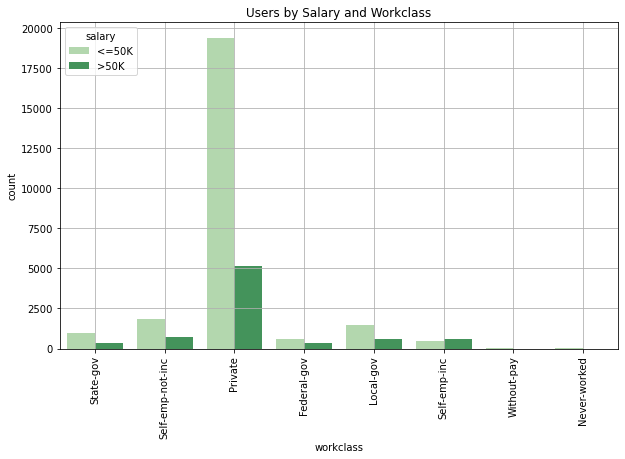

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass',hue='salary',data=data,palette="Greens")
plt.title("Users by Salary and Workclass", fontsize = 12)
plt.xticks(rotation = 90)
plt.grid()

<AxesSubplot:>

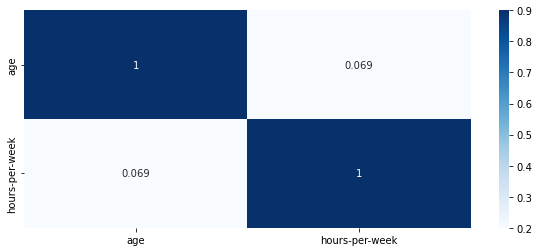

In [46]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=0.2, vmax=0.9, annot=True, cmap="Blues")

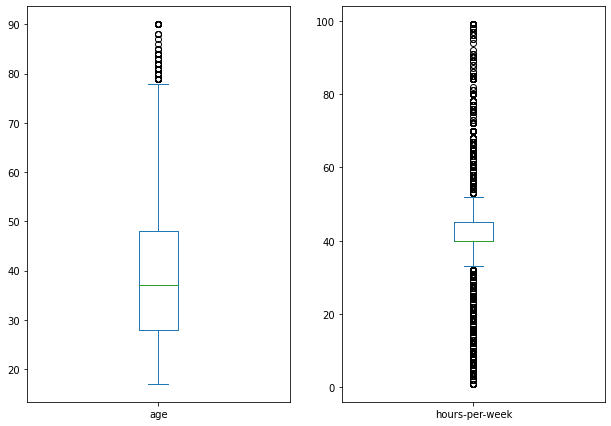

In [47]:
data.plot(kind='box',subplots=True,layout=(2,3),figsize=(16,16));

In [48]:
#Outlier handling of age

Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
IQR=Q3-Q1
print(Q1,Q2,Q3)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('up_limit=',up_limit)
outlier=[]
for x in data['age']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

indA=data['age']>up_limit
indA1=data.loc[indA].index
indB=data['age']<low_limit
indB1=data.loc[indB].index

data.drop(indA1,inplace=True)
data.drop(indB1,inplace=True)

28.0 37.0 48.0
low_limit= -2.0
up_limit= 78.0


Text(0.5, 1.0, 'Box plot of age after removal of outlier')

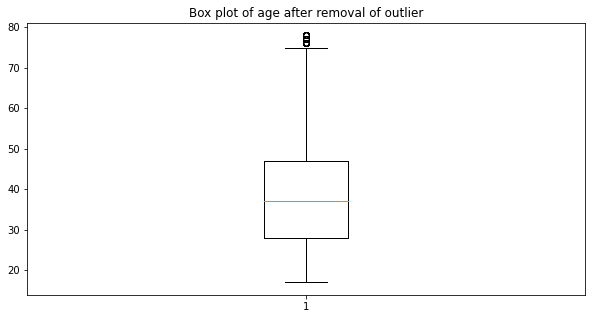

In [49]:
plt.boxplot(data['age'])
plt.title('Box plot of age after removal of outlier')

In [50]:
#Outlier handling of hours-per-week

Q1=np.percentile(data['hours-per-week'],25,interpolation='midpoint')
Q2=np.percentile(data['hours-per-week'],50,interpolation='midpoint')
Q3=np.percentile(data['hours-per-week'],75,interpolation='midpoint')
IQR=Q3-Q1
print(Q1,Q2,Q3)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print('low_limit=',low_limit)
print('up_limit=',up_limit)
outlier=[]
for x in data['hours-per-week']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

indA=data['hours-per-week']>up_limit
indA1=data.loc[indA].index
indB=data['hours-per-week']<low_limit
indB1=data.loc[indB].index

data.drop(indA1,inplace=True)
data.drop(indB1,inplace=True)

40.0 40.0 45.0
low_limit= 32.5
up_limit= 52.5


Text(0.5, 1.0, 'Box plot of hours-per-week after removal of outlier')

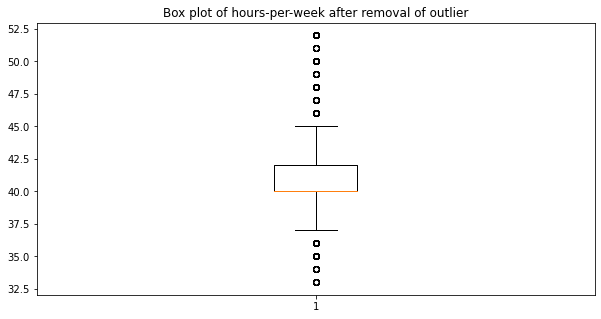

In [51]:
plt.boxplot(data['hours-per-week'])
plt.title('Box plot of hours-per-week after removal of outlier')

In [52]:
data.shape

(23499, 11)

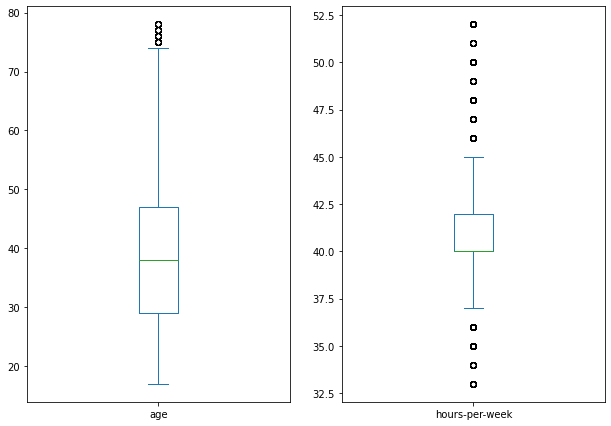

In [53]:
data.plot(kind='box',subplots=True,layout=(2,3),figsize=(16,16));

Outliers have been addressed, resulting in a streamlined dataset with dimensions reduced from (32561,14) to (23499,11).